# Linear Regression 

Multilinear regression, also called multiple linear regression, is a statistical technique used to model the relationship between one dependent (response) variable and two or more independent (predictor) variables. 

The goal of multiple linear regression is to understand how the independent variables influence the dependent variable.


1. Basic Formula of Multilinear Regression

In multiple linear regression, the relationship between the dependent variable y and the independent variables x1,x2,...,xp​ is given by:

    y=β0+β1x1+β2x2+...+βpxp+ϵ

Where:

    y= Dependent variable (the outcome or predicted value).
    x1,x2,...,xp= Independent variables (predictors).
    β0= Intercept (the value of yy when all xx variables are 0).
    β1,β2,...,βp​ = Coefficients of the independent variables (how much each xixi​ contributes to the outcome).
    ϵϵ = Error term (residuals), representing the difference between the predicted value and the actual value.

## Imports

In [22]:
#imports 

import pandas as pd 
import seaborn as sns
import numpy as np 
import  statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression


Data loading

In [8]:
df = pd.read_csv("./data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


. inspect 

In [9]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

## Defining our variables 

In [24]:
# x_base,x_multi,y
x_base = df[['weight']]
x_multi = df[['weight','displacement','horsepower', 'acceleration']]
y= df['mpg']


## simple linear regression 

In [25]:
# simple linear regresion in statsmodel
model = sm.OLS(y,sm.add_constant(x_base))
ols_results = model.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          6.02e-102
Time:                        20:02:47   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#  to compare stsmodels and scikit learn results 

def print_results(sk_model,ols_model):
    
    print(f"""


StatsModels intercept:    {ols_model.params["const"]}
scikit-learn intercept:   {sk_model.intercept_}

StatsModels coefficient:\n{ols_model.params}
scikit-learn coefficient: {sk_model.coef_}
""")

## in sklearn

In [33]:
# simple model in sklearn
sklearn_baseline_model = LinearRegression()
sk_results =  sklearn_baseline_model.fit(y=y,X=x_base)
print_results(sk_model=sk_results,ols_model=ols_results)






StatsModels intercept:    46.216524549017606
scikit-learn intercept:   46.21652454901758

StatsModels coefficient:
const     46.216525
weight    -0.007647
dtype: float64
scikit-learn coefficient: [-0.00764734]



## Multilinear Regression

linear regression with multiple variables 

In [38]:
# multi model in ols 
ols_multi_model = sm.OLS(endog=y,exog=sm.add_constant(x_base))
ols_multi_results = ols_multi_model.fit()
ols_multi_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):          6.02e-102
Time:                        20:25:11   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## in sklearn 

In [39]:
# multi linear regression in sklearn 
sklearn_multi_model= LinearRegression()
sklearn_multi_results= sklearn_multi_model.fit(X=x_multi,y=y)
print_results(sk_model=sklearn_multi_model, ols_model=ols_multi_results)




StatsModels intercept:    46.216524549017606
scikit-learn intercept:   45.25113969933522

StatsModels coefficient:
const     46.216525
weight    -0.007647
dtype: float64
scikit-learn coefficient: [-0.00528051 -0.00600087 -0.04360773 -0.023148  ]



## Multiple Linear Regression Visualization

### plot fit 

This shows the true (blue) vs. predicted (red) values, with the particular predictor along the x-axis

Note that unlike with a simple regression, the red dots don't appear in a perfectly straight line.

This is because their predictions are made based on the entire model, not just this predictor.

ValueError: 'horsepower' is not in list

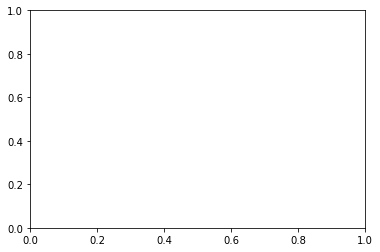

In [41]:
#single column
sm.graphics.plot_fit(ols_multi_results, 'horsepower')
plt.show()

multiple 

In [636]:
# multi


## Partial regression plots 

a partial regression plot shows the "partial" effect of one predictor, independent of the other predictors in the model.

In [637]:
# single column 


In [638]:
# multi column


## Ploting Residuals

component and component-plus-residual plot

In [639]:
# ccpr plot 

## Plotting all at Once 

plotting all four at once for a given predictior

In [640]:
# all plot at once 

In [641]:
# To do all columns

# Multiple Regression Model Evaluation

Multiple regression models, like simple regression models, can be evaluated using R-Squared (coefficient of determination) for measuring the amount of explained variance, and the F-statistic for determining statistical significance. You also may want to consider using other metrics, including adjusted R-Squared and error-based metrics such as MAE and RMSE. Each metric provides slightly different information, so you will need additional information from stakeholders in order to choose the most appropriate one(s).

### Reviewing F-Statistic and R-Squared

First, we can check the model's F-statistic and F-statistic p-value to see if the model was statistically significant overall:

In [642]:
# summary

## Limitations of R-Squared:

R-Squared is a commonly used metric for model performance, but it has limitations. First, it always increases when more predictors are added to the model, which can lead to overfitting. This can result in unstable coefficients and a violation of linear regression assumptions. To address this, Adjusted R-Squared can be used, which accounts for the number of predictors.

Second, R-Squared is sensitive to the variance in the data. Small variances in predictors can lead to a low R-Squared, while large variances can result in a high R-Squared, regardless of how well the model fits the true relationship. It can also be difficult to explain to non-technical stakeholders. To address this, error-based metrics (e.g., MSE, RMSE) can be used to evaluate model performance in terms of prediction errors rather than variance.

# Error-Based Metrics

In [643]:
# getting  predictions


Error-based metrics are used to evaluate the performance of regression models by quantifying the difference between predicted and actual values. These metrics focus on the errors (or residuals) the model makes in its predictions

### Mean Absolute Error (MAE)

**Mean Absolute Error (MAE)** is calculated as the average of the absolute differences between the predicted and actual values. It is given by the formula:

\[
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|
\]

Where:
- \(y_i\) is the actual value,
- \(\hat{y_i}\) is the predicted value,
- \(n\) is the number of data points.

### Key Points:
- **Interpretability**: MAE is in the same units as the target variable, making it easy to interpret.
- **Equal Weight to All Errors**: MAE treats all errors equally, meaning it does not penalize larger errors more heavily compared to smaller ones.
- **Lower is Better**: A lower MAE indicates a model that makes smaller average errors in its predictions.


In [644]:
# MAE calculated 

#### in sklearn 

In [645]:
# MAE sklearn




 ## Root Mean Squeared Error (RMSE)

Root Mean Squared Error (RMSE) is a popular error metric used to measure the difference between the predicted values and the actual values in regression models. Unlike Mean Absolute Error (MAE), RMSE penalizes larger errors more heavily due to the squaring of the residuals. It provides a more sensitive measure of model performance, especially when large errors are particularly undesirable.



#### **Formula for RMSE**:

The RMSE is calculated using the following formula:

\[
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
\]

Where:
- \( y_i \) is the actual value,
- \( \hat{y_i} \) is the predicted value,
- \( n \) is the number of data points.


In [646]:
# RMSE calculated



## In sklearn 

In [647]:
# RMSE sklearn 


## Note:

    Choose MAE if you want a simple, easy-to-interpret measure of average error that treats all errors equally.
    Choose RMSE if you want to penalize larger errors more and have a metric that gives more weight to significant deviations from the actual values.